# **PROJECT 1**

DOMAIN: 

Digital content and entertainment industry

CONTEXT: 

The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The
model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

DATA DESCRIPTION: 

The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a
specific word, but instead is used to encode any unknown word.


PROJECT OBJECTIVE: 

Build a sequential NLP classifier which can use input text
parameters to determine the customer sentiments.





STEP 1: Import and analyse the data set.

In [5]:
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from keras.datasets import imdb
from matplotlib import pyplot

#taking the 10000 most frequent words
top_words = 10000

#dividing the data into train and test set
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [8]:
x_train.shape

(25000,)

STEP 2: Perform relevant sequence adding on the data

In [9]:
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#restricting the max_review_length to 500
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

STEP 3: Perform following data analysis:
1. Print shape of features and labels

In [10]:
print("train_data ", x_train.shape)
print("train_labels ", y_train.shape)
print("_"*100)
print("test_data ", x_test.shape)
print("test_labels ", y_test.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in x_train]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in x_train]))

train_data  (25000, 500)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000, 500)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
500


Print value of any one feature and it's label

In [11]:
#print value of feature
print(x_train[100])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [12]:
#print value of label
print(y_train[100])

0


Step 4: Decode the feature value to get original sentence

In [13]:
#let us decode a sample review
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0                                                    # Padding
word_dict['>'] = 1                                                   # Start
word_dict['?'] = 2                                                   # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

1654784/1641221 [==============================] - 0s 0us/step
                                                                                                                                                                                                                                                                                          > this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good 

Step 5: Design, train, tune and test a sequential model.

In [14]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dense

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                256016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#Let us enable EarlyStopping before we fit the model
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)
model_results=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=128, callbacks=[early_stop], verbose=0)

Epoch 00102: early stopping


In [16]:
train_acc = model.evaluate(x_train, y_train, verbose=1)
test_acc = model.evaluate(x_test, y_test, verbose=1)
print(train_acc, test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 1.3736 - accuracy: 0.8694
[2.0483987839270412e-09, 1.0] [1.3735830783843994, 0.8693600296974182]


Here we see that we have received the training accuracy as 100% and test accuracy as 87%.

We will try using some machine learning models also.

In [17]:
def analyze(text):
    translator = text.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

Step 6: Use the designed model to print the prediction on any one sample.

In [18]:
import string
analyze('The movie was highly interesting.')

0.9971687

In [19]:
analyze('Yeah!whatever')

0.4464893

In [20]:
analyze('Hopeless')

0.7051978

In [21]:
analyze('The movie was awesome.')

0.9985444

Conclusion:

We can see that our model predicts the sentiments almost corretly for each test input. Values towards 1.0 being positive sentiments and towards 0.0 being negative sentiments.

# **PROJECT 2**

DOMAIN: 

Social media analytics

CONTEXT: 

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected
using hashtag based supervision but such datasets are noisy in terms of labels and
language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

DATA DESCRIPTION:

The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets: Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and
informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with
much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in
teasing apart the real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

PROJECT OBJECTIVE: 

Build a sequential NLP classifier which can use input text parameters
to determine the customer sentiments.

Step 1: Read and explore the data

In [24]:
import json

headlines_data = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)

In [25]:
headlines_data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [26]:
headlines_data.shape

(26709, 3)

There are 26709 rows and 3 columns in the dataset.

In [27]:
headlines_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_sarcastic,26709.0,0.438953,0.496269,0.0,0.0,0.0,1.0,1.0


In [28]:
#Let us check for missing values
headlines_data.isnull().sum().sum()

0

The dataset has 0 null values.

In [29]:
headlines_data.describe(include='object')

,article_link,headline
count,26709,26709
unique,26708,26602
top,https://www.huffingtonpost.comhttp://nymag.com...,sunday roundup
freq,2,10


Let us check for any duplicate values in the dataset

In [30]:
len(headlines_data[headlines_data.headline.duplicated()])

107

There are 107 duplicate headlines in the dataset. Let us check if they have been classified differently or not

In [31]:
count_of_target = 0
for target in headlines_data.groupby(headlines_data.headline).is_sarcastic.agg(list):
    if(len(set(list(target))) != 1):
        count_of_target += 1
print(count_of_target)

0


We can see that the duplicate headlines are not labelled differently in the dataset.

Let us plot the balance of sarcastic and non sarcastic values in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


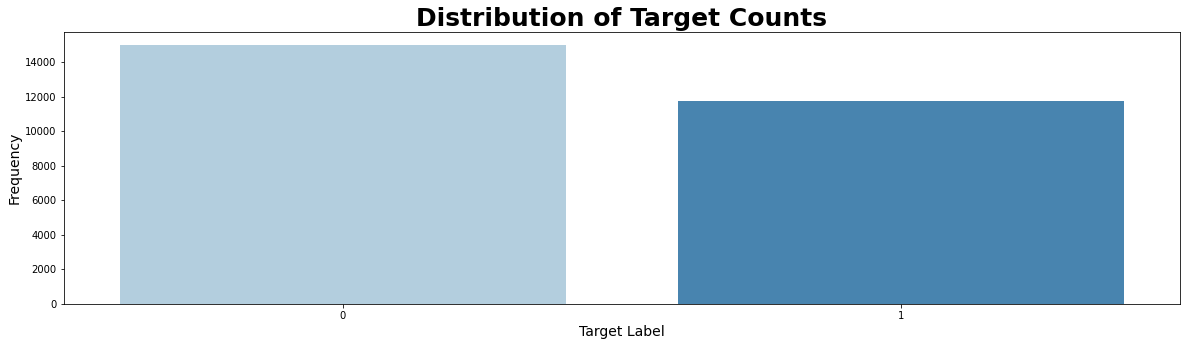

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(headlines_data.is_sarcastic, palette='Blues')
plt.title("Distribution of Target Counts", size=25, weight='bold')
plt.xlabel("Target Label", size=14)
plt.ylabel("Frequency", size=14)
plt.show()

We can see that there are less sarcastic headlines and more non-sarcastic headlines

Let us now plot a graph to check the words used for sarcasm and some words which are not used as sarcasm in the dataset.

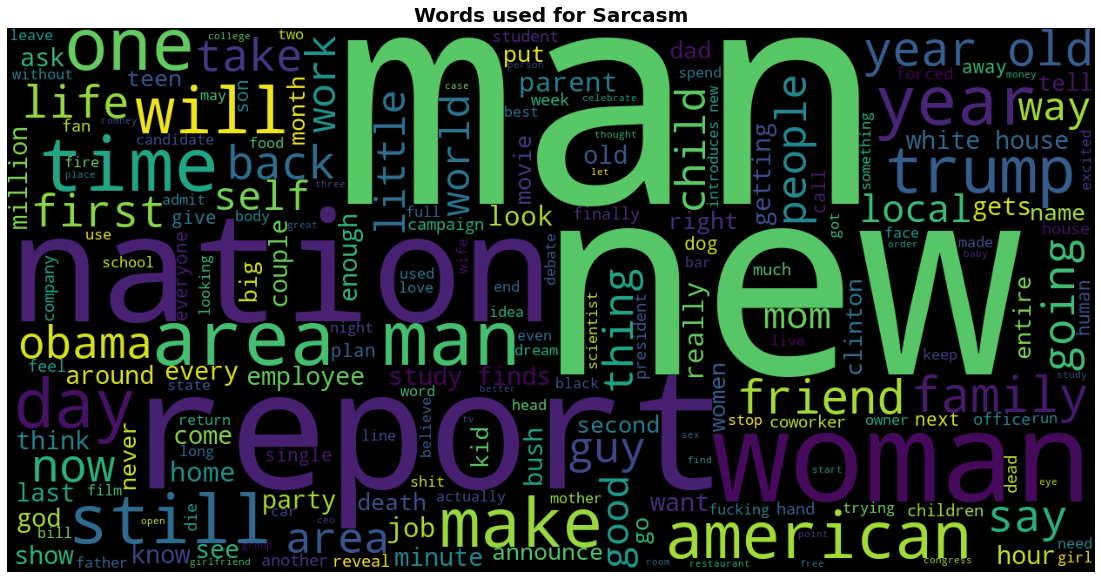

In [33]:
from wordcloud import WordCloud
keywords_sarcasm = " ".join(line for line in headlines_data[headlines_data.is_sarcastic==1].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords_sarcasm)
plt.figure(figsize=(20, 10))
plt.title("Words used for Sarcasm", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

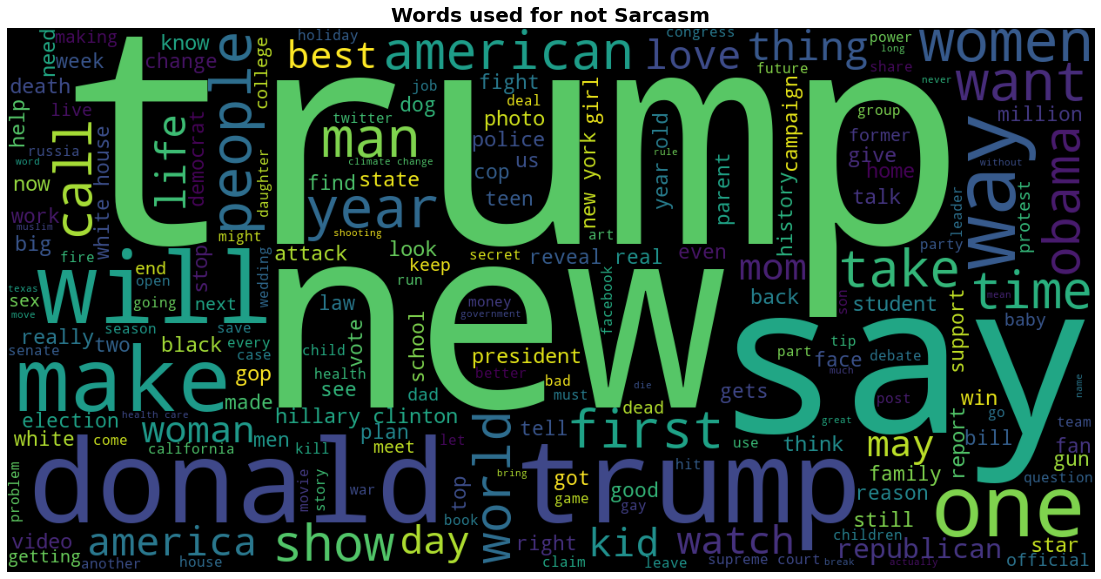

In [34]:
keywords_notsarcasm = " ".join(line for line in headlines_data[headlines_data.is_sarcastic==0].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords_notsarcasm)
plt.figure(figsize=(20, 10))
plt.title("Words used for not Sarcasm", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Step 2: Retain relevant columns

We can see that the article_link column will not be useful in our analysis, hence we can drop the column

In [35]:
headlines_data.drop('article_link', inplace=True, axis=1)
headlines_data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Step 3: Get length of each sentence.

Let us first clean the data

In [36]:
import nltk

In [37]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
import string
def clean_headline_data(headline):
    STOPWORDS = set(stopwords.words("english"))
    headline = headline.lower()
    headline = " ".join(word for word in headline.split() if word not in STOPWORDS)
    headline = "".join(word for word in headline if word not in set(string.punctuation))
    return headline

headlines_data.headline = headlines_data.headline.apply(clean_headline_data)

In [39]:
headlines_data.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,mom starting fear sons web series closest thin...,1
3,boehner wants wife listen come alternative deb...,1
4,jk rowling wishes snape happy birthday magical...,0


Let us use Glove embeddings to preprocess the data

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from nltk.tokenize import word_tokenize
my_corpus = []
for text in headlines_data['headline']:
    words = [word.lower() for word in word_tokenize(text)] 
    my_corpus.append(words)
num_words = len(my_corpus)
print(num_words)

26709


In [42]:
#Let us divide the data into train(80%) and test(20%)
from sklearn.model_selection import train_test_split
X = headlines_data['headline'].values
y = headlines_data['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

We will now tokenize the words and padding for equal dimensions. We are setting the max length to 32

In [43]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
max_len = 32
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, truncating='post', padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, truncating='post', padding='post')

In [44]:
word_index = tokenizer.word_index
print("Total count of unique words in the dataset: {}".format(len(word_index)))

Total count of unique words in the dataset: 25441


Let us make a  weight matrix of all words in corpus using the given pre-trained glove embeddings

In [45]:
import numpy as np

embedding = {}
with open("/content/glove.6B.200d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

In [47]:
embedding_matrix = np.zeros((num_words, 200))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

In [48]:
embedding_matrix.shape

(26709, 200)

Define and compile a bi-directional LSTM model

In [57]:
from keras.initializers import Constant
from keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
import keras.optimizers

In [59]:
model_biLSTM = Sequential()

model_biLSTM.add(Embedding(input_dim=num_words, output_dim=200, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
model_biLSTM.add(Bidirectional(LSTM(units=64, recurrent_dropout = 0.3, dropout = 0.3, 
                             return_sequences = True)))
model_biLSTM.add(Bidirectional(LSTM(units=32, recurrent_dropout = 0.1, dropout = 0.1)))
model_biLSTM.add(Dense(1, activation='sigmoid'))

model_biLSTM.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model_biLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 200)           5341800   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32, 128)           135680    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,518,761
Trainable params: 176,961
Non-trainable params: 5,341,800
_________________________________________________________________


In [61]:
model_results= model_biLSTM.fit(X_train, y_train, epochs=4, batch_size=1024, 
                    validation_data=(X_test, y_test))

Epoch 1/4
21/21 [==============================] - 86s 3s/step - loss: 0.6408 - accuracy: 0.6233 - val_loss: 0.5026 - val_accuracy: 0.7572
Epoch 2/4
21/21 [==============================] - 51s 2s/step - loss: 0.4796 - accuracy: 0.7690 - val_loss: 0.4515 - val_accuracy: 0.7879
Epoch 3/4
21/21 [==============================] - 51s 2s/step - loss: 0.4181 - accuracy: 0.8035 - val_loss: 0.4454 - val_accuracy: 0.7937
Epoch 4/4
21/21 [==============================] - 52s 2s/step - loss: 0.3619 - accuracy: 0.8382 - val_loss: 0.4028 - val_accuracy: 0.8111


We can see that the training accuracy we have got is 83.2% and validation accuracy is 81.1% which is good.

Fit the model and check the validation accuracy

In [67]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
print(classification_report(y_test, model_biLSTM.predict_classes(X_test)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2996
           1       0.78      0.79      0.79      2346

    accuracy                           0.81      5342
   macro avg       0.81      0.81      0.81      5342
weighted avg       0.81      0.81      0.81      5342

